<a href="https://colab.research.google.com/github/hyperkraz/MAT421/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HW 2

***Problem 1***

In [2]:
def my_lin_interp(x_arr, y_arr, x_value):
  print("The formula is: y(X) = y1 + [(y2 - y1) / (x2 - x1)]*(X - x1) where x1 -> xi and y1 -> yi and x2 -> xi + 1 and y2 -> yi + 1")
  x = x_arr
  y1 = y_arr
  y = x_value
  j = 0
  listlength = len(x)
  print(listlength)
  print(x[0:1])
  print(x[1:2])

  for m in range(listlength):
    if j + 1 == listlength:
      break
    if x[j] < y and y < x[j + 1]:
      print("The number is in range of {} and {}, so it is between index {} and {}".format(x[j], x[j + 1], j, j + 1))
      print("These are the x1 and x2 values, so we pick the corresponding y1 and y2 values from list y")
      print(y1[j])
      print(y1[j + 1])
      intervals = zip(x_arr, x_arr[1:], y_arr, y_arr[1:])
      for v in intervals:print(v)
      return x[j], x[j + 1], y1[j], y1[j + 1]
    else:
      print("The number is not in range of {} and {}".format(x[j], x[j + 1]))
    j += 1

x_arr, y_arr = [1.5, 2.7, 3.9, 5.3, 6], [2.3, 4.7, 6.4, 5.3, 5]
x_value = 5
x1, x2, y1, y2 = my_lin_interp(x_arr, y_arr, x_value)
print(x1, x2, y1, y2)
slope = (y2 - y1) / (x2 - x1)
print(slope)
y_x_value = y1 + slope*(x_value - x1)
print("The interpolation at x equals 5 is:", y_x_value)


The formula is: y(X) = y1 + [(y2 - y1) / (x2 - x1)]*(X - x1) where x1 -> xi and y1 -> yi and x2 -> xi + 1 and y2 -> yi + 1
5
[1.5]
[2.7]
The number is not in range of 1.5 and 2.7
The number is not in range of 2.7 and 3.9
The number is in range of 3.9 and 5.3, so it is between index 2 and 3
These are the x1 and x2 values, so we pick the corresponding y1 and y2 values from list y
6.4
5.3
(1.5, 2.7, 2.3, 4.7)
(2.7, 3.9, 4.7, 6.4)
(3.9, 5.3, 6.4, 5.3)
(5.3, 6, 5.3, 5)
3.9 5.3 6.4 5.3
-0.7857142857142861
The interpolation at x equals 5 is: 5.535714285714286


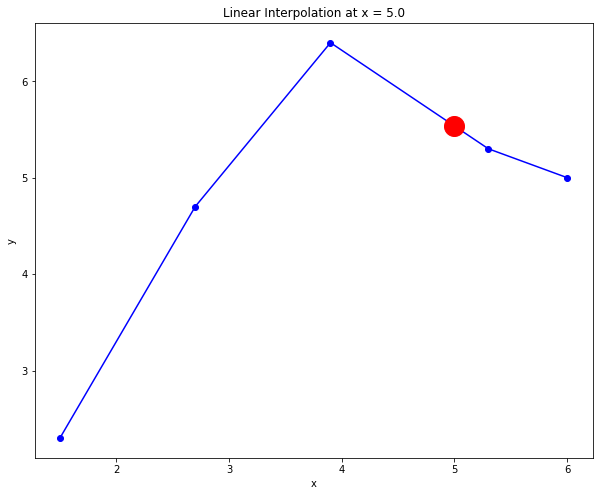

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
plt.plot(x_arr, y_arr, '-ob')
plt.plot(5.0, y_x_value, 'ro', markersize=20)
plt.title('Linear Interpolation at x = 5.0')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

***Problem 2***

In [7]:
import numpy as np
def my_cubic_spline(x_array, y_array, x_value):
  x = x_array
  yl = y_array
  y = x_value
  j = 0
  listlength = len(x)
  print(listlength)
  print(x[0:1])
  print(x[1:2])
  answer = np.array([1, 2, 0, 0, 0])
  answer = answer[:, np.newaxis]
  print(answer)
  cubic = np.array([[1, 1, 0, 0, 0], [0, 0, 1, 1, 1], [1, 3, -1, 0, 0], [0, 3, 0, -1, 0], [0, 0, 0, 2, 6]])
  array = np.dot(np.linalg.inv(cubic), answer)
  print(array)
  print("a0 = 0, a1 = 3, c0 = 0, b0 = {}, d0 = {}, b1 = {}, c1 = {}, d1 = {}".format(array[0], array[1], array[2], array[3], array[4]))

  s0 = 3 + array[0]*(2.5 - 2) + 0*(2.5 - 2)**2+array[1]*(2.5 - 2)**3

  s1 = 3 + array[2]*(2.5 - 2) + array[3]*(2.5 - 2)**2 + array[4]*(2.5 - 2)**3

  print("x = 1.5 lies between [1, 2], so y is between [2, 3] and thus cubic interpolation is:", s0)

  return answer, s0

x_array, y_array = [2, 3, 4], [3, 4, 6]

x_value = 2.5

solution, s0 = my_cubic_spline(x_array, y_array, x_value)

print("Therefore the cubic spline interpolation at x equals 2.5 is:", s0)


3
[2]
[3]
[[1]
 [2]
 [0]
 [0]
 [0]]
[[ 0.75]
 [ 0.25]
 [ 1.5 ]
 [ 0.75]
 [-0.25]]
a0 = 0, a1 = 3, c0 = 0, b0 = [0.75], d0 = [0.25], b1 = [1.5], c1 = [0.75], d1 = [-0.25]
x = 1.5 lies between [1, 2], so y is between [2, 3] and thus cubic interpolation is: [3.40625]
Therefore the cubic spline interpolation at x equals 2.5 is: [3.40625]


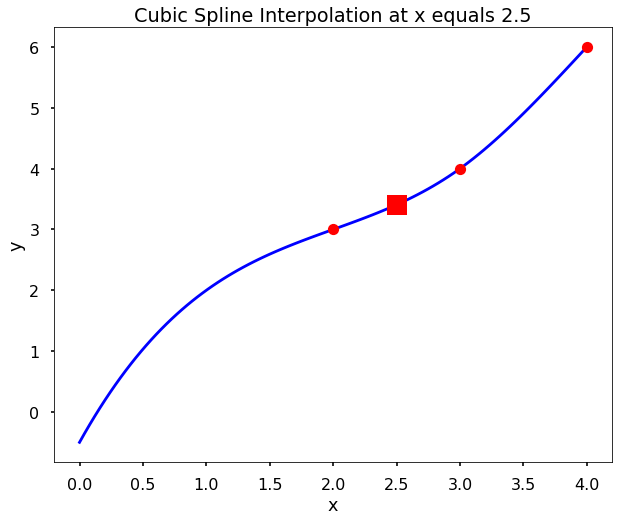

In [9]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
x_array, y_array = [2, 3, 4], [3, 4, 6]
x_value = 2.5
f = CubicSpline(x_array, y_array, bc_type='natural')
x_new = np.linspace(0, 4, 100)
y_new = f(x_new)
plt.figure(figsize = (10,8))
plt.plot(x_new, y_new, 'b')
plt.plot(x_array, y_array, 'ro')
plt.plot(2.5, s0, 'rs', markersize=20)
plt.title('Cubic Spline Interpolation at x equals 2.5')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

***Problem 3***

[[1 0 1 0 1]
 [0 1 1 1 0]
 [1 1 0 0 0]
 [0 1 1 1 0]
 [1 1 1 0 0]]
xlist - x0 = [-1.96 -0.85  0.26  1.37  2.48]
x_list: [2.14 3.25 4.36 5.47 6.58] 
xi: 2
ylist - y0 = [-2.25 -0.04  1.57  0.09  0.9 ]
y_list: [3.65 5.86 7.47 5.99 6.8 ] 
yi: 1
First data at (4.1, 5.9): (2, 1)
xlist - x0 = [-4.56 -3.45 -2.34 -1.23 -0.12]
x_list: [2.14 3.25 4.36 5.47 6.58] 
xi: 4
ylist - y0 = [-0.45  1.76  3.37  1.89  2.7 ]
y_list: [3.65 5.86 7.47 5.99 6.8 ] 
yi: 0
Second data at (6.7, 4.1): (4, 0)


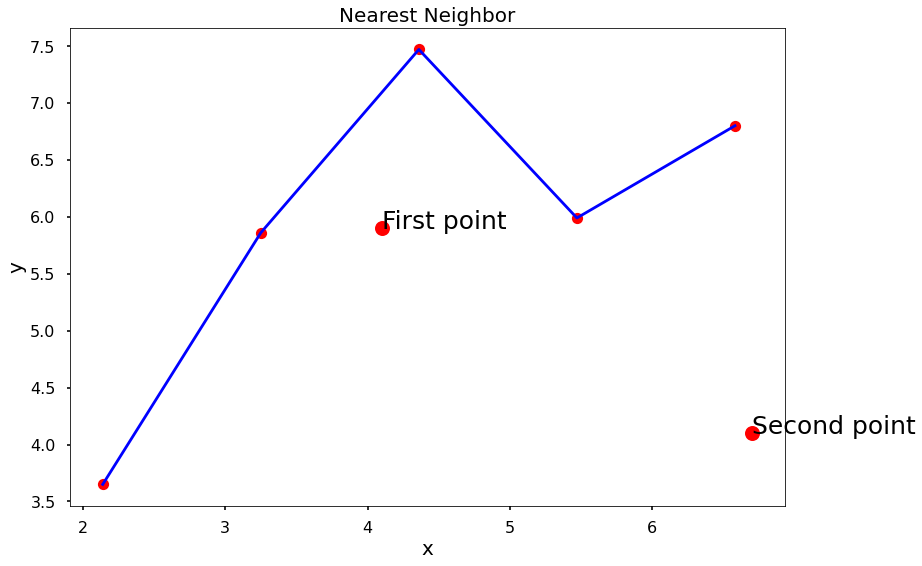

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def my_nearest_neighbour(x0, y0, x):
  xi = np.abs(x_list - x0).argmin()

  print("xlist - x0 =", (x_list - x0))
  print("x_list:", x_list, "\nxi:", xi)

  yi = np.abs(y_list - y0).argmin()

  print("ylist - y0 =", (y_list - y0))
  print("y_list:", y_list, "\nyi:", yi)

  result = xi, yi

  return result

x_list = np.array([2.14, 3.25, 4.36, 5.47, 6.58])
y_list = np.array([3.65, 5.86, 7.47, 5.99, 6.8])
data = np.array([[1, 0, 1, 0, 1], [0, 1, 1, 1, 0], [1, 1, 0, 0, 0], [0, 1, 1, 1, 0], [1, 1, 1, 0, 0]])

print(data)

data1 = my_nearest_neighbour(4.1, 5.9, x_list)
print("First data at (4.1, 5.9):", data1)

data2 = my_nearest_neighbour(6.7, 4.1, x_list)
print("Second data at (6.7, 4.1):", data2)

plt.plot(x_list, y_list, "ro")
plt.plot(x_list, y_list, "b")

plt.annotate("First point", (4.1, 5.9), size = 25)
plt.plot(4.1, 5.9, 'ro', ms = 15)

plt.annotate("Second point", (6.7, 4.1), size = 25)
plt.plot(6.7, 4.1, 'ro', ms = 15)

plt.xlabel("x", size = 20)
plt.ylabel("y", size = 20)

plt.title("Nearest Neighbor", size = 20)

plt.show()


***Problem 4***

If there are too many data points, then the Cubic Spline would involve a lot of equations and be very tedious so the Nearest Neighbor would be a good alternative.

Also, situations that would require higher degree polynomials (quadratic and above) such as when there are a large number of curves in the graph would then require the calculation of higher order derivatives which makes the calculations more complicated and then potentially require more memory and faster processor speed.

Nearest Neighbor is much quicker and less complicated, so in the above examples it is superior to cubic spline interpolation.

***Problem 7***

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from scipy import interpolate

def my_interp_plotter(x, y, X, option):
  opt = option
  plt.figure(figsize = (10, 8))
  plt.plot(x, y, 'ro', label = "data")

  f = interpolate.interp1d(x, y, opt)
  Y = f(X)

  plt.plot(X, Y, "b", label = opt)
  plt.xlabel("X")
  plt.ylabel("Y")

  plt.legend()

  if opt == "nearest":
    plt.title("Nearest Neighbor")

  elif opt == "linear":
    plt.title("Linear Interpolation")

  else:
    plt.title("Cubic Spline")

  plt.show()




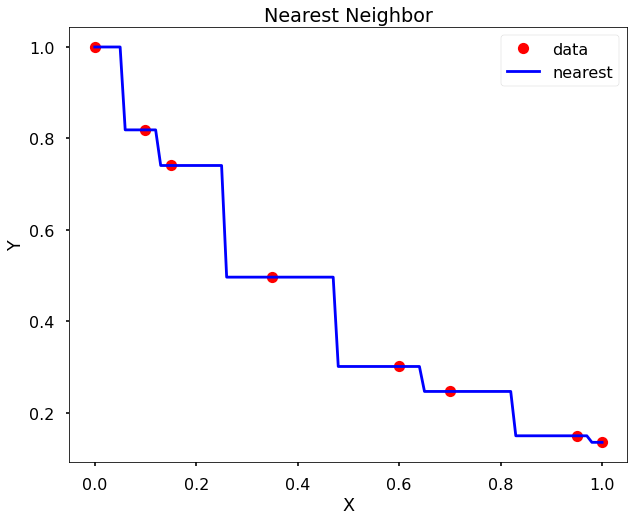

In [ ]:
x = np.array([0, .1, .15, .35, .6, .7, .95, 1])
y = np.array([1, 0.8187, 0.7408, 0.4966, 0.3012, 0.2466, 0.1496, 0.1353])

my_interp_plotter(x, y, np.linspace(0, 1, 101), 'nearest')

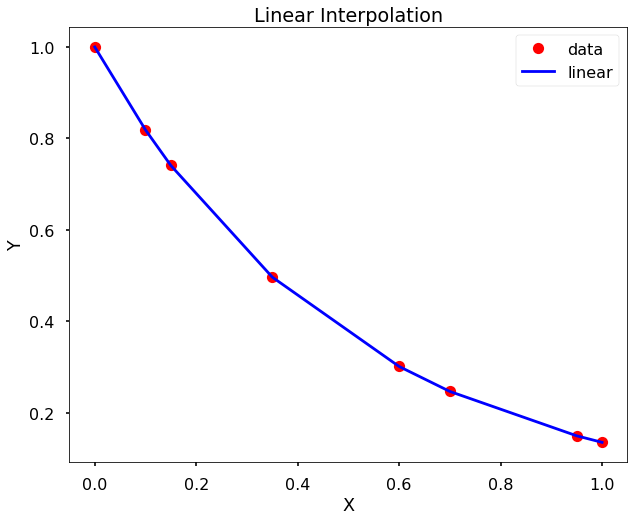

In [ ]:
my_interp_plotter(x, y, np.linspace(0, 1, 101), 'linear')

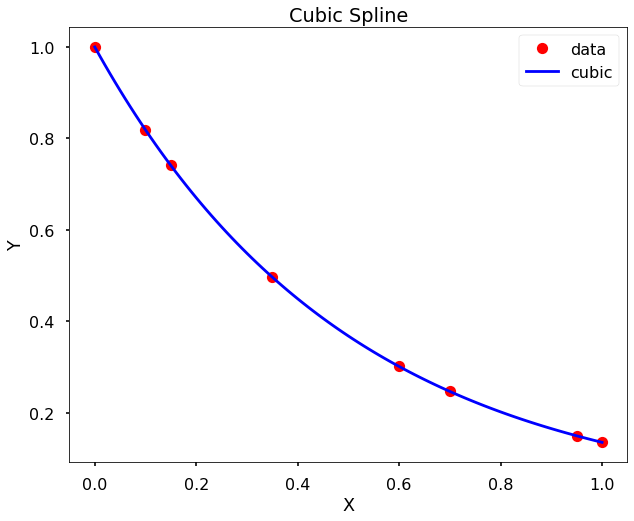

In [ ]:
my_interp_plotter(x, y, np.linspace(0, 1, 101), 'cubic')